# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def get_mean(list):
  """
  returns the mean of all values in the list
  """
  return sum(list) / len(list)


def get_variance(list, ddof=1):
  """
  returns the variance of all values in the list
  """
  mean = get_mean(list)
  total = sum([(list[i] - mean)**2 for i in range(len(list))])
  return total / (len(list) - ddof)


def get_std(list, ddof=1):
  """
  returns the standard deviation of all values in the list
  """
  return (get_variance(list, ddof))**0.5

In [67]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

print("Mean: ", get_mean(sales))
print("Variance: ", get_variance(sales))
print("Std. Dev.: ", get_std(sales))

Mean:  3052.714285714286
Variance:  214387.90476190473
Std. Dev.:  463.0204150595357


In [11]:
import numpy as np

# checking answers with the library
print("Mean: ", np.mean(sales))
print("Variance: ", np.var(sales, ddof=1))
print("Std. Dev.: ", np.std(sales, ddof=1))

Mean:  3052.714285714286
Variance:  214387.90476190473
Std. Dev.:  463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use library functions for calculating the covariance since we didn't specifically talk about its formula)

In [12]:
customers = [127, 80, 105, 92, 120, 115, 93]

#numpy covariance function
np.cov(sales, customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [13]:
# That will be a bit clearer with pandas
import pandas as pd
df = pd.DataFrame({"sales":sales, "customers":customers})
df.head()

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120


In [14]:
# pandas covariance function
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [16]:
# customers standard deviation
get_std(customers)

17.057326313123664

In [17]:
# show correlation
np.cov(sales, customers) / (get_std(sales) * get_std(customers))

array([[27.14495851,  0.96283398],
       [ 0.96283398,  0.03683925]])

In [18]:
# show correlation with pandas
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [30]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', index_col=0)
print(titanic.shape)
titanic.head()

(1310, 15)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [28]:
# covariance
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [29]:
# correlation
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

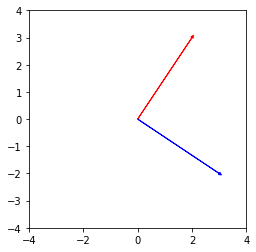

In [43]:
# Orthogonal vectors are also perpendicular
import matplotlib.pyplot as plt

# I already happened to know the trick that [x,y] and [y,-x] are orthogonal
vec1 = np.array([2, 3])
vec2 = np.array([3, -2])

plt.axes().set_aspect('equal')
plt.arrow(0,0, vec1[0], vec1[1],head_width=.1, head_length=0.1, color ='red')
plt.arrow(0,0, vec2[0], vec2[1],head_width=.1, head_length=0.1, color ='blue')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [56]:
A = np.array([-5,3,7])
B = np.array([6,-8,2])

# Two vectors are orthogonal if their dot product is zero
np.dot(A, B)

-40

In [58]:
# showing the others
np.dot(vec1, vec2)

0

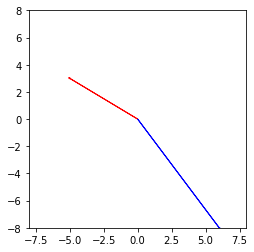

In [57]:
# A and B are not orthogonal
plt.axes().set_aspect('equal')
plt.arrow(0,0, A[0], A[1],head_width=.1, head_length=0.1, color ='red')
plt.arrow(0,0, B[0], B[1],head_width=.1, head_length=0.1, color ='blue')
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [63]:
import numpy.linalg as linalg
c = np.array([2, -15, 6, 20])

# ||c|| = the norm of c
print("||c||^2 =", linalg.norm(c)**2)

print("c dot c =", np.dot(c, c))

print("c^T * c =", np.matmul(c.T, c))

||c||^2 = 665.0
c dot c = 665
c^T * c = 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7\hat{i} + 12\hat{j}
\newline
e = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [65]:
f = np.array([4, 12, 11, 9, 2])

# get the unit vector by multiplying all values by 1 / ||f||
unit_f = f * (1 / linalg.norm(f))
unit_f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

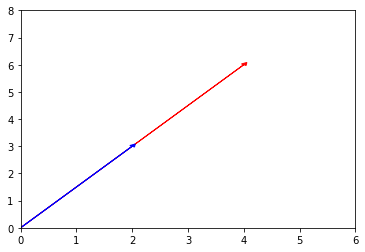

In [71]:
# linearly dependent vectors
V1 = [2,3]
V2 = [4,6]

plt.arrow(0,0, V2[0], V2[1],head_width=.1, head_length=0.1, color ='red')
plt.arrow(0,0, V1[0], V1[1],head_width=.1, head_length=0.1, color ='blue')
plt.xlim(0, 6)
plt.ylim(0, 8)
plt.show()

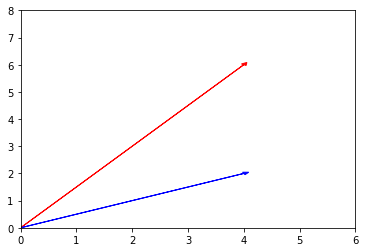

In [73]:
# linearly independent vectors
V1 = [4,2]
V2 = [4,6]

plt.arrow(0,0, V1[0], V1[1],head_width=.1, head_length=0.1, color ='blue')
plt.arrow(0,0, V2[0], V2[1],head_width=.1, head_length=0.1, color ='red')
plt.xlim(0, 6)
plt.ylim(0, 8)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

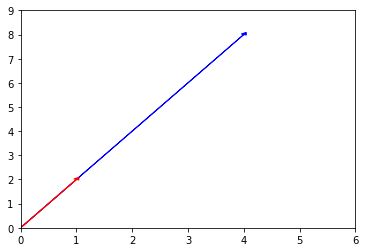

In [76]:
# their span is 1 dimensional, since they are linearly dependent
g = [1, 2]
h = [4, 8]

plt.arrow(0,0, h[0], h[1],head_width=.1, head_length=0.1, color ='blue')
plt.arrow(0,0, g[0], g[1],head_width=.1, head_length=0.1, color ='red')
plt.xlim(0, 6)
plt.ylim(0, 9)
plt.show()

In [81]:
# also shown by their Rank being 1
linalg.matrix_rank([g,h])

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [82]:
# None of them are linearly dependent, the span is 3 dimensions
l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]

linalg.matrix_rank([l, m, n])

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



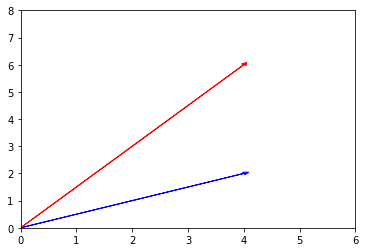

In [83]:
# any two 2D vectors that are not linearly independnt can form a basis for R^2

# same graph as 4.1
V1 = [4,2]
V2 = [4,6]

plt.arrow(0,0, V1[0], V1[1],head_width=.1, head_length=0.1, color ='blue')
plt.arrow(0,0, V2[0], V2[1],head_width=.1, head_length=0.1, color ='red')
plt.xlim(0, 6)
plt.ylim(0, 8)
plt.show() 

## 6.2 What does it mean to form a basis?

A set of vectors form a basis for a space if you could reach any vector in that space by adding some multiple of those vectors.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [85]:
# same as 5.2
P = [[1, 2, 3],
     [-1, 0, 7],
     [4, 8, 2]]

linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix also tells us the number of dimensions spanned by its row vectors.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

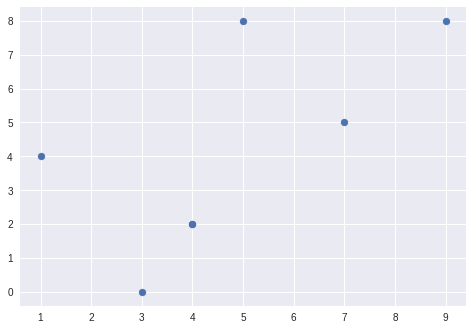

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()